In [32]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = pybamm.lithium_ion.SPM()

In [3]:
geometry = model.default_geometry
for k,v in geometry.items():
    print(k)
    for k2,v2 in v['primary'].items():
        print(k2,v2['min'])

negative electrode
x_n 0.0
separator
x_s Negative electrode width [m] / Negative electrode width [m] + Separator width [m] + Positive electrode width [m]
positive electrode
x_p Negative electrode width [m] / Negative electrode width [m] + Separator width [m] + Positive electrode width [m] + Separator width [m] / Negative electrode width [m] + Separator width [m] + Positive electrode width [m]
negative particle
r_n 0.0
positive particle
r_p 0.0


In [4]:
param = model.default_parameter_values

In [5]:
param.process_geometry(geometry)
param.process_model(model)

In [7]:
for k,v in model.rhs.items():
    v.render()

*
├── -
│   └── /
│       ├── 1.0
│       └── /
│           ├── /
│           │   ├── **
│           │   │   ├── Negative particle radius [m]
│           │   │   └── 2.0
│           │   └── function (graphite_mcmb2528_diffusivity_Dualfoil)
│           │       ├── Maximum concentration in negative electrode [mol.m-3]
│           │       ├── Reference temperature [K]
│           │       ├── Reference temperature [K]
│           │       ├── Negative solid diffusion activation energy [J.mol-1]
│           │       └── 8.3144598
│           └── /
│               ├── *
│               │   ├── *
│               │   │   ├── 96485.33289
│               │   │   └── Maximum concentration in negative electrode [mol.m-3]
│               │   └── +
│               │       ├── +
│               │       │   ├── Negative electrode width [m]
│               │       │   └── Separator width [m]
│               │       └── Positive electrode width [m]
│               └── function (abs_non_zero)
│            

In [12]:
submesh = model.default_submesh_types
var_pts = model.default_var_pts
mesh = pybamm.Mesh(geometry, model.default_submesh_types, model.default_var_pts)
type(mesh)

pybamm.meshes.meshes.Mesh

In [17]:
methods = model.default_spatial_methods
disc = pybamm.Discretisation(mesh,methods)
disc.process_model(model)

In [18]:
for k,v in model.rhs.items():
    v.render()

*
├── -
│   └── /
│       ├── 1.0
│       └── /
│           ├── /
│           │   ├── **
│           │   │   ├── Negative particle radius [m]
│           │   │   └── 2.0
│           │   └── function (graphite_mcmb2528_diffusivity_Dualfoil)
│           │       ├── Maximum concentration in negative electrode [mol.m-3]
│           │       ├── Reference temperature [K]
│           │       ├── Reference temperature [K]
│           │       ├── Negative solid diffusion activation energy [J.mol-1]
│           │       └── 8.3144598
│           └── /
│               ├── *
│               │   ├── *
│               │   │   ├── 96485.33289
│               │   │   └── Maximum concentration in negative electrode [mol.m-3]
│               │   └── +
│               │       ├── +
│               │       │   ├── Negative electrode width [m]
│               │       │   └── Separator width [m]
│               │       └── Positive electrode width [m]
│               └── function (abs_non_zero)
│            

In [20]:
model.concatenated_rhs.evaluate(y=model.concatenated_initial_conditions,t=0)

array([[ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [-13.85041551],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [ -0.        ],
       [  8.10720593]])

In [24]:
solver = model.default_solver
t = np.linspace(0,1,100)
solution = solver.solve(model, t)

In [25]:
voltage = pybamm.ProcessedVariable(model.variables['Terminal voltage [V]'], solution.t, solution.y, mesh=mesh)
c_s_n_surf = pybamm.ProcessedVariable(
    model.variables['Negative particle surface concentration'], solution.t, solution.y, mesh=mesh
)
c_s_p_surf = pybamm.ProcessedVariable(
    model.variables['Positive particle surface concentration'], solution.t, solution.y, mesh=mesh
)

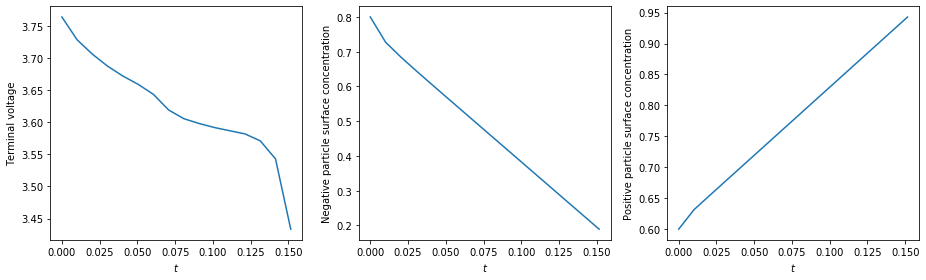

In [35]:
t = np.linspace(0,1,250)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,4))

ax1.plot(solution.t, voltage(solution.t))
ax1.set_xlabel(r'$t$')
ax1.set_ylabel('Terminal voltage')

ax2.plot(solution.t, c_s_n_surf(t=solution.t, x=0))
ax2.set_xlabel(r'$t$')
ax2.set_ylabel('Negative particle surface concentration')

ax3.plot(solution.t, c_s_p_surf(t=solution.t, x=1))
ax3.set_xlabel(r'$t$')
ax3.set_ylabel('Positive particle surface concentration')

plt.tight_layout()
plt.show()

In [36]:
import ipywidgets as widgets
quick_plot = pybamm.QuickPlot(model, mesh, solution)
widgets.interact(quick_plot.plot, t=widgets.FloatSlider(min=0,max=quick_plot.max_t,step=0.05,value=0));

interactive(children=(FloatSlider(value=0.0, description='t', max=0.15151515151515152, step=0.05), Output()), …

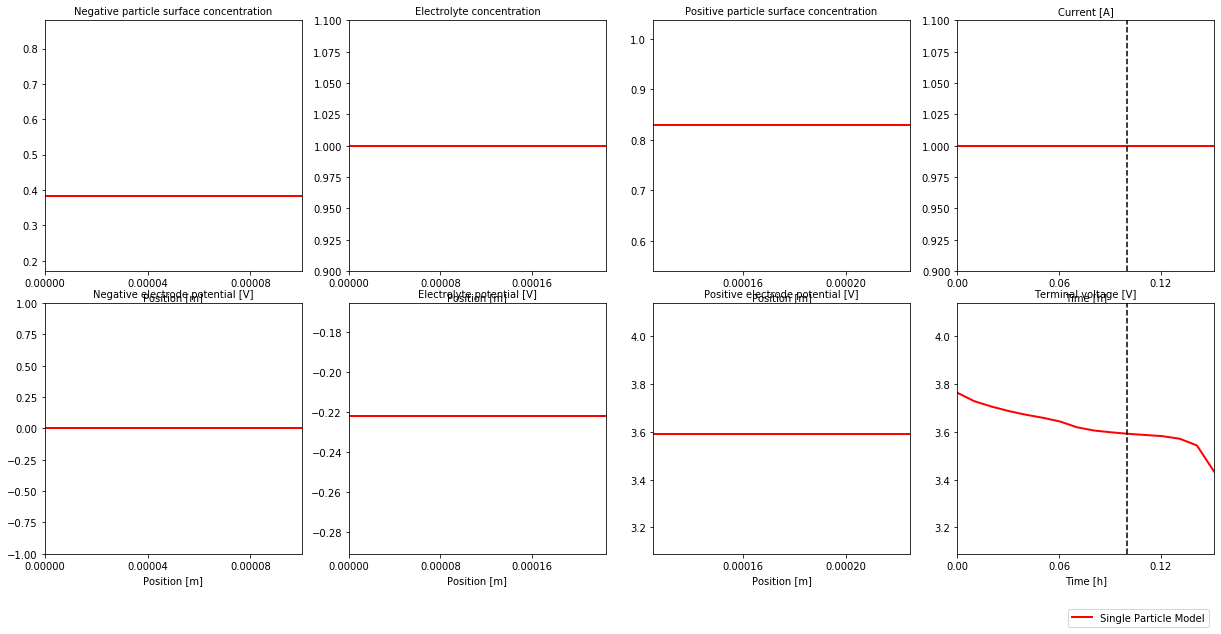

In [38]:
quick_plot.plot(0.1)